In [1]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import seaborn as sns
import sys

sys.path.append("../utils")
from bitcode import *
from utils import *

%load_ext autoreload
%autoreload 2

In [21]:
aedat_dir = r"D:\Fight\rotation\Wei Zhang\projects\courtship song\data\aedat"
out_dir = r"D:\Fight\rotation\Wei Zhang\projects\courtship song\data\out"
sig_name = "dvSave-2022_04_02_02_51_00_bitcode_test.csv"

sig_path = os.path.join(aedat_dir, sig_name)

x = np.loadtxt(sig_path)
sr = 5000

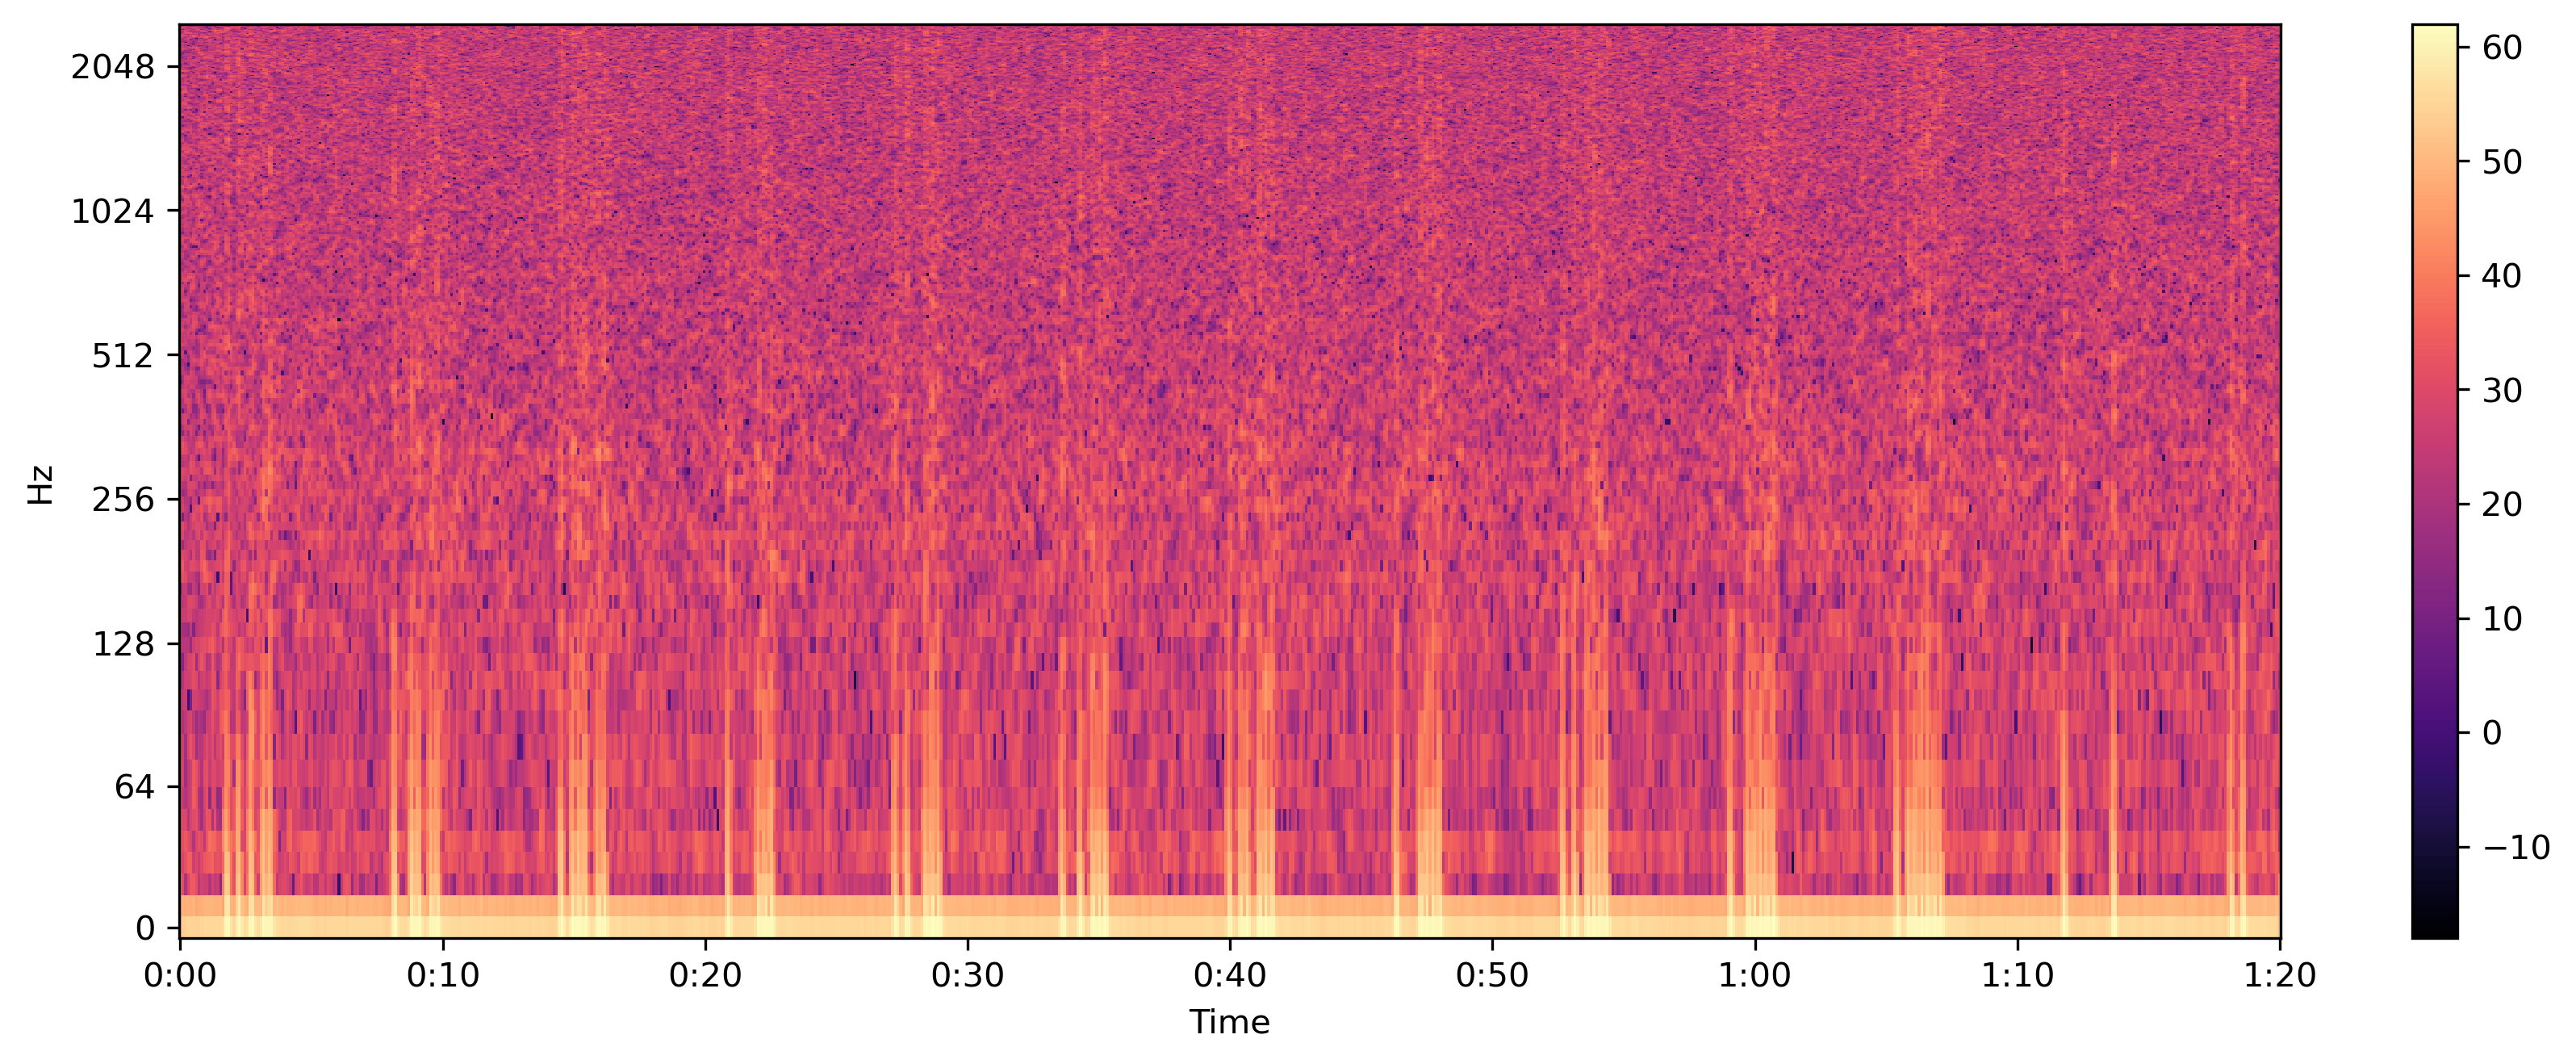

In [13]:
show_spec(x, sr, n_fft=512, yscale='log', time_range=[0, 20])

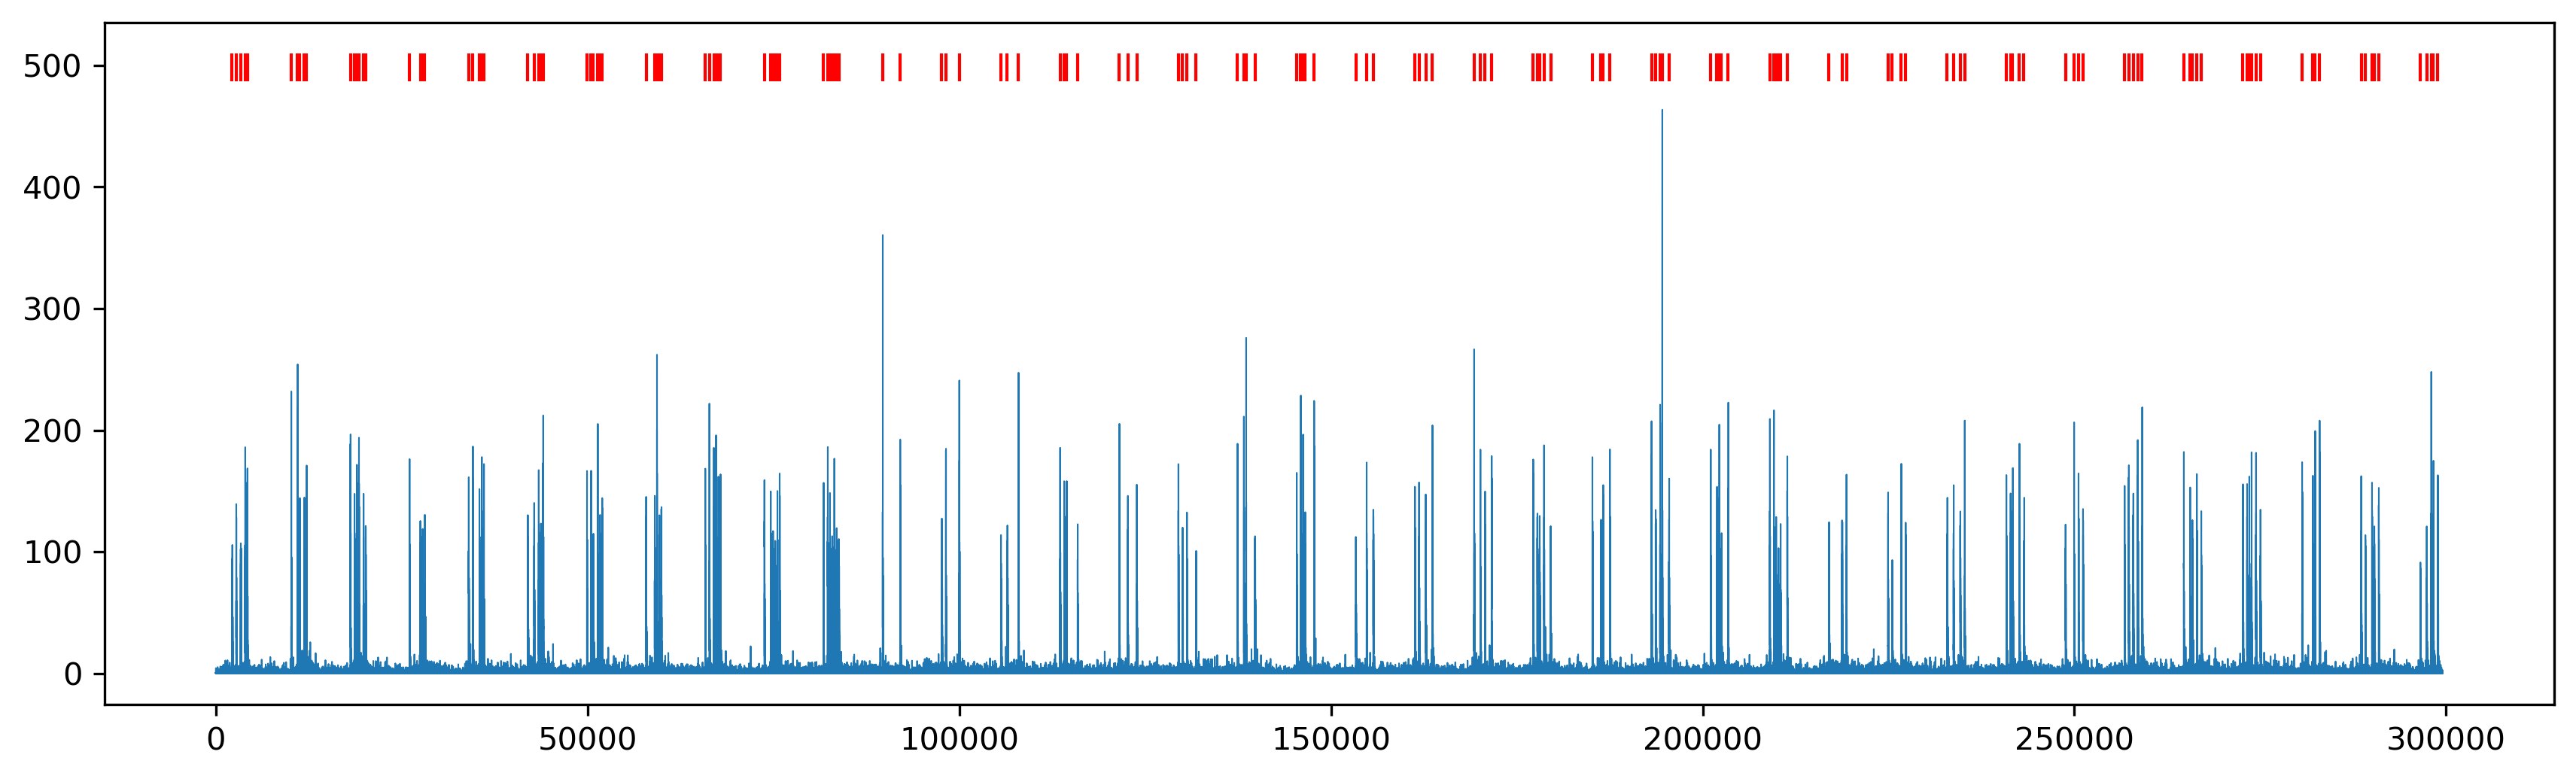

[(2.0314, 54),
 (3.6224, 55),
 (5.214, 56),
 (6.8044, 57),
 (8.3966, 58),
 (9.9876, 59),
 (11.5776, 60),
 (13.1684, 61),
 (14.759, 62),
 (16.3508, 63),
 (17.9416, 64),
 (19.5312, 65),
 (21.1226, 66),
 (22.7134, 67),
 (24.3056, 68),
 (25.8952, 69),
 (27.4866, 70),
 (29.078, 71),
 (30.6686, 72),
 (32.26, 73),
 (33.8514, 74),
 (35.4418, 75),
 (37.0334, 76),
 (38.6248, 77),
 (40.2154, 78),
 (41.8054, 79),
 (43.3972, 80),
 (44.9884, 81),
 (46.5778, 82),
 (48.1688, 83),
 (49.7604, 84),
 (51.3508, 85),
 (52.9414, 86),
 (54.5324, 87),
 (56.1244, 88),
 (57.7152, 89)]

In [29]:
x_perc = getPerc(x, sr, n_fft=2048, time_range=[0,60])
pulses = getPulseOnsets(x_perc, 0.03*sr, 0.03*sr, show=True)
codes = decodeBitcodeTrain(pulses/sr, show=False)
codes

In [30]:
import pandas as pd
df = pd.DataFrame(codes, columns=['time', 'code'])
print(df)

       time  code
0    2.0314    54
1    3.6224    55
2    5.2140    56
3    6.8044    57
4    8.3966    58
5    9.9876    59
6   11.5776    60
7   13.1684    61
8   14.7590    62
9   16.3508    63
10  17.9416    64
11  19.5312    65
12  21.1226    66
13  22.7134    67
14  24.3056    68
15  25.8952    69
16  27.4866    70
17  29.0780    71
18  30.6686    72
19  32.2600    73
20  33.8514    74
21  35.4418    75
22  37.0334    76
23  38.6248    77
24  40.2154    78
25  41.8054    79
26  43.3972    80
27  44.9884    81
28  46.5778    82
29  48.1688    83
30  49.7604    84
31  51.3508    85
32  52.9414    86
33  54.5324    87
34  56.1244    88
35  57.7152    89


In [31]:
savepath = os.path.join(out_dir, sig_name.split('.')[0] + '_codes.csv')

df.to_csv(savepath)